In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# SET BELOW TO TRAINING SET DIRECTORY
train_data_dir = './Full_Set - Copy'

img_rows, img_cols = 448, 448

#SET num_classes to the number of different classes you are training on
num_classes = 3
batch_size = 16

# Below creates datagenerator with augmentations set 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split = 0.2)
 
 
# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 16
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'training')
 
validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'validation')

Found 857 images belonging to 3 classes.
Found 213 images belonging to 3 classes.


In [ ]:
train_generator

In [ ]:
import tensorflow.keras as keras


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #3: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #4: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #5: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 448, 448, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 448, 448, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 448, 448, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 448, 448, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 448, 448, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 448, 448, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 224, 224, 32)      0

In [ ]:
%matplotlib inline
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model, to_file='LittleVGG.png', show_shapes=True, show_layer_names=True)
# img = mpimg.imread('LittleVGG.png')
# plt.figure(figsize=(100,70))
# imgplot = plt.imshow(img) 

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [ ]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder


#Change below to directory to store models
checkpoint = ModelCheckpoint("C:/Users/thisi/Documents/Shared-CV/YarraValley/models/multi_littleVgg_gpu_0103.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 8,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])

nb_train_samples = 833
nb_validation_samples = 220 
epochs = 50

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 52 steps, validate for 13 steps
Epoch 1/50
51/52 [============================>.] - ETA: 1s - loss: 1.5832 - accuracy: 0.3923
Epoch 00001: val_loss improved from inf to 11.71129, saving model to C:/Users/thisi/Documents/Shared-CV/YarraValley/models/multi_littleVgg_gpu_0103.h5
52/52 [==============================] - 99s 2s/step - loss: 1.5823 - accuracy: 0.3919 - val_loss: 11.7113 - val_accuracy: 0.3750
Epoch 2/50
51/52 [============================>.] - ETA: 1s - loss: 1.2895 - accuracy: 0.4682
Epoch 00002: val_loss improved from 11.71129 to 1.87555, saving model to C:/Users/thisi/Documents/Shared-CV/YarraValley/models/multi_littleVgg_gpu_0103.h5
52/52 [==============================] - 97s 2s/step - loss: 1.2854 - accuracy: 0.4713 - val_loss: 1.8755 - val_accuracy: 0.4567
Epoch 3/50
51/52 [============================>.] - ETA: 1s - loss: 1.1119 - accuracy: 0.5318
Epoch 00003: val_loss improved from 1.87555 to 1.37393, savin

52/52 [==============================] - 60s 1s/step - loss: 0.5340 - accuracy: 0.7875 - val_loss: 0.5784 - val_accuracy: 0.7788
Epoch 25/50
51/52 [============================>.] - ETA: 0s - loss: 0.5779 - accuracy: 0.7808
Epoch 00025: val_loss did not improve from 0.57837
52/52 [==============================] - 60s 1s/step - loss: 0.5726 - accuracy: 0.7851 - val_loss: 0.6165 - val_accuracy: 0.7788
Epoch 26/50
51/52 [============================>.] - ETA: 0s - loss: 0.5101 - accuracy: 0.8107
Epoch 00026: val_loss did not improve from 0.57837
52/52 [==============================] - 59s 1s/step - loss: 0.5067 - accuracy: 0.8107 - val_loss: 0.6398 - val_accuracy: 0.7548
Epoch 27/50
51/52 [============================>.] - ETA: 0s - loss: 0.5131 - accuracy: 0.8020
Epoch 00027: val_loss did not improve from 0.57837

Epoch 00027: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
52/52 [==============================] - 60s 1s/step - loss: 0.5100 - accuracy: 0.8034 - val_

In [ ]:
import pickle 

pickle_out = open("LittleVgg488_v2_history.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

In [ ]:
epochs = 50

history2 = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size,
    initial_epoch = 39)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 52 steps, validate for 13 steps
Epoch 40/50
51/52 [============================>.] - ETA: 0s - loss: 0.4337 - accuracy: 0.8394
Epoch 00040: val_loss improved from 0.54776 to 0.51499, saving model to C:/Users/thisi/Documents/Shared-CV/YarraValley/models/multi_littleVgg_gpu_0103.h5
52/52 [==============================] - 66s 1s/step - loss: 0.4357 - accuracy: 0.8376 - val_loss: 0.5150 - val_accuracy: 0.7740
Epoch 41/50
51/52 [============================>.] - ETA: 0s - loss: 0.4667 - accuracy: 0.8169
Epoch 00041: val_loss improved from 0.51499 to 0.50129, saving model to C:/Users/thisi/Documents/Shared-CV/YarraValley/models/multi_littleVgg_gpu_0103.h5
52/52 [==============================] - 66s 1s/step - loss: 0.4690 - accuracy: 0.8181 - val_loss: 0.5013 - val_accuracy: 0.8029
Epoch 42/50
51/52 [============================>.] - ETA: 0s - loss: 0.4566 - accuracy: 0.8344
Epoch 00042: val_loss did not improve from 0.50129
52/52 

In [ ]:
pickle_out = open("LittleVgg488_v2_history2.pickle","wb")
pickle.dump(history2.history, pickle_out)
pickle_out.close()

In [ ]:
epochs = 50

history3 = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size,
    initial_epoch = 38)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 59 steps, validate for 15 steps
Epoch 39/50
58/59 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.8105
Epoch 00039: val_loss improved from 0.51419 to 0.50634, saving model to C:/Users/thisi/Documents/Shared-CV/YarraValley/models/multi_littleVgg_gpu2.h5
59/59 [==============================] - 73s 1s/step - loss: 0.5385 - accuracy: 0.8116 - val_loss: 0.5063 - val_accuracy: 0.8000
Epoch 40/50
58/59 [============================>.] - ETA: 0s - loss: 0.5658 - accuracy: 0.7800
Epoch 00040: val_loss did not improve from 0.50634
59/59 [==============================] - 72s 1s/step - loss: 0.5697 - accuracy: 0.7784 - val_loss: 0.5252 - val_accuracy: 0.7875
Epoch 41/50
58/59 [============================>.] - ETA: 0s - loss: 0.5760 - accuracy: 0.7832
Epoch 00041: val_loss did not improve from 0.50634
59/59 [==============================] - 71s 1s/step - loss: 0.5698 - accuracy: 0.7859 - val_loss: 0.5126 - val_a

In [ ]:
pickle_out = open("LittleVgg488_history3.pickle","wb")
pickle.dump(history3.history, pickle_out)
pickle_out.close()

Found 220 images belonging to 3 classes.
Confusion Matrix
[[64 12  1]
 [ 4 67  4]
 [ 2 23 43]]
Classification Report
              precision    recall  f1-score   support

  burst_blue       0.91      0.83      0.87        77
     nothing       0.66      0.89      0.76        75
   stop_gold       0.90      0.63      0.74        68

    accuracy                           0.79       220
   macro avg       0.82      0.79      0.79       220
weighted avg       0.82      0.79      0.79       220



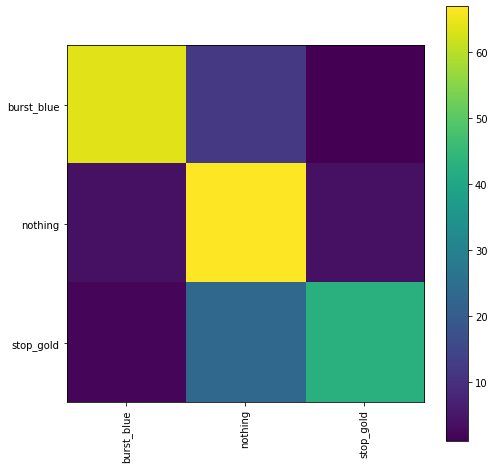

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'validation',
        shuffle=False)


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

# nb_train_samples = 966
nb_validation_samples = 220

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size +1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)